In [110]:
import scipy.io
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt

In [127]:
bc = scipy.io.loadmat('BC.mat')['BC']
particles = np.loadtxt("data_particle.dat")
radii = np.loadtxt("data_radii.dat")
cyl = bc[0,0,:]
wall = bc[0,1,:]
#bc[0] += bc[1]
bc, wall

(array([[[ 3.45514465e-02,  3.45514465e-02,  1.12768070e-01,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,  1.84260325e+00,  1.00000000e+00,  1.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  2.52728440e+00,  0.00000000e+00,  0.00000000e+00, -1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [-1.80805180e+00, -1.80805180e+00,  1.12768070e-01,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [-1.80805180e+00,  3.45514465e-02,  2.52728440e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.84260325e-01, -1.00000000e+00,  1.00000000e+00]],
 
        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00, -1.20725817e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.

In [112]:
def ProjectPointsToCylinder(points,cyl):
    point_to_cyl_origin = points-cyl[:3]
    cyl_axis = cyl[3:6]
    cyl_radius = cyl[6]
    cyl_axis /= np.linalg.norm(cyl_axis)

    axis_projection = point_to_cyl_origin*cyl_axis*cyl_axis
    axis_projection += cyl[:3]
    axis_projection_to_points = points-axis_projection
    axis_projection_to_points_scaled = axis_projection_to_points/np.linalg.norm(axis_projection_to_points,axis=1,keepdims=True)*cyl_radius
    point_on_cyl = axis_projection+axis_projection_to_points_scaled
    return point_on_cyl

In [113]:
def ProjectPointsToHyperplane(points,plane):
    a = wall[:3]-particles                                               # Vector A from particle P to point W on plane
    b = wall[3:6]                                                        # Vector B: normal vector wall
    b /= np.linalg.norm(b)                                                       
    a1 = a*b*b
    point_on_plane = particles+a1
    
    return point_on_plane

In [162]:
topology_wall = []
for wall_id,wall in enumerate(bc[0]):
    if wall[-1] == 1:
        point_on_wall = ProjectPointsToCylinder(particles,wall)
    if wall[-1] == 0:
        point_on_wall = ProjectPointsToHyperplane(particles,wall)
    P_W_contact = np.linalg.norm(particles-point_on_wall,axis=1)-radii <= 0
    P_idx = np.argwhere(P_W_contact)
    W_idx = np.ones((P_idx.shape[0],1))*-(wall_id+1)
    top_temp = np.concatenate([P_idx,W_idx],axis=1)
    if wall_id == 0:
        topology_wall = top_temp
    else:
        topology_wall = np.concatenate([topology_wall,top_temp])
topology_wall

array([[105.,  -1.],
       [110.,  -1.],
       [113.,  -1.],
       [121.,  -1.],
       [124.,  -1.],
       [183.,  -1.],
       [186.,  -1.],
       [187.,  -1.],
       [188.,  -1.],
       [190.,  -1.],
       [191.,  -1.],
       [192.,  -1.],
       [195.,  -1.],
       [256.,  -1.],
       [257.,  -1.],
       [259.,  -1.],
       [287.,  -1.],
       [288.,  -1.],
       [289.,  -1.],
       [297.,  -1.],
       [301.,  -1.],
       [307.,  -1.],
       [342.,  -1.],
       [344.,  -1.],
       [345.,  -1.],
       [358.,  -1.],
       [359.,  -1.],
       [383.,  -1.],
       [384.,  -1.],
       [385.,  -1.],
       [390.,  -1.],
       [ 59.,  -3.],
       [292.,  -4.],
       [312.,  -4.],
       [314.,  -4.],
       [319.,  -4.],
       [324.,  -4.],
       [339.,  -4.],
       [340.,  -4.],
       [354.,  -4.],
       [355.,  -4.],
       [364.,  -4.],
       [365.,  -4.],
       [379.,  -4.],
       [382.,  -4.]])

In [122]:
point_on_wall = ProjectPointsToCylinder(particles,cyl)
#point_on_wall = ProjectPointsToHyperplane(particles,wall)


In [ ]:
topology_wall = []
for wid in range(len(bc)):
    a = bc[wid,:3]-point[:3]                                                # Vector A from particle P to point W on plane
    b = bc[wid,3:6]                                                         # Vector B: normal vector wall
    a1 = np.abs(np.sum(a*b))                                                # Vector a1(unit) : Absolute size projection A normal to wall
    if a1 - point[3] <= tol*point[3]:
        topology_wall.append([i+1,-(wid+1)])
topology_wall


In [ ]:
from Encoding import BCEncoding,ConstructTopology
ConstructTopology(particles,)
BCEncoding(particles,)

In [7]:
from Plotting import Plot3DVectors
#fig = plt.figure()
#ax = fig.add_subplot(projection='3d')
#Plot3DVectors(ax,axis_projection,s)

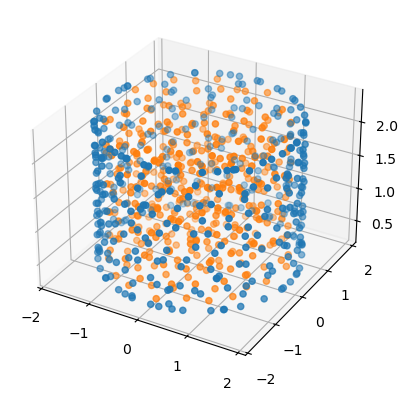

In [124]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
vector = point_on_wall
x = vector[:,0]
y = vector[:,1]
z = vector[:,2]
ax.scatter(x,y,z)
vector = particles
x = vector[:,0]
y = vector[:,1]
z = vector[:,2]
ax.scatter(x,y,z)

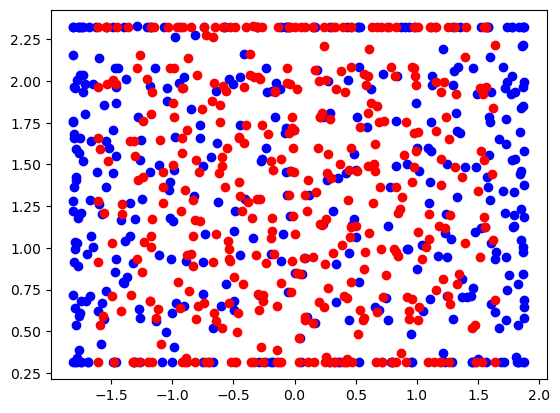

In [123]:
vector = point_on_wall
x = vector[:,0]
y = vector[:,1]
z = vector[:,2]
plt.plot(y,z,'o',color='b')
vector = particles
x = vector[:,0]
y = vector[:,1]
z = vector[:,2]
plt.plot(y,z,'o',color='r')